# Lecture 3: Multilayer Perceptions 

 **Reading**:   Chapter 4.1-4.5 of *Dive Into Deep Learning*

## Outline

* Multilayer fully connected neural networks
* Model Selection, overfitting and underfitting
* Regularisization methods: weight decay




# Multilayer Perceptrons


## Limitatios of Linear Models

  * Assumption of *monotonicity*: outputs  increase proportionally with any feature 
  * Limited capacity: can only separate linearly separable data. 
    * A data set is linearly separable if for each class there is a hyperplane to separate this class from the others.
  * To increse model capacity, one needs to introduce non-linear models 

## From Single Layer to Multiple Layers

  * To overcome the limitations of linear models, one can introduce hidden layers and
  * Stack many fully-connected layers on top of each other.
![An MLP with a hidden layer of 5 hidden units. ](../img/mlp.svg)

  * A composite function based on linear transformations: the output of each preceding layer is fed as the input of the following layer.
  * However, a simple stacking of multiple linear transformations is still equivalent to another linear transformation.
  
  $\mathbf{z}=A_1\mathbf{x}, \mathbf{y}=A_2\mathbf{z}$, then $\mathbf{y}=B\mathbf{x}$ where $B=A_2A_1$


## From Linear to Nonlinear


*  *Activation function* $\sigma$ is applied to each hidden unit following the linear transformation.
* With activation functions in place, it is no longer going to collapse our MLP into a linear model.

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

* To build more general MLPs, we can continue stacking such hidden layers:
$$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$$

## Universal Approximators

* MLPs are universal approximators which means they can approximate any nonlinear functions.
* Even with a single-hidden-layer network, given enough nodes, and the right set of weights, one can model any function, though
  * learning that function may be difficult.


* Many functions can be approximately much more compactly by using deeper (vs. wider) networks.

## Activation Functions

* Activation functions decide whether a neuron should be activated or not. 

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU Function

*  *Rectified linear unit* (*ReLU*). Given an element $x$, 

$$\operatorname{ReLU}(x) = \max(x, 0).$$

* The ReLU function retains only positive elements and discards all negative elements by setting the corresponding activations to 0.
* Piecewise linear


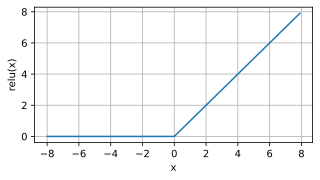

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

* *Derivative* of the ReLU function: 0 when the input is negative, and 1 when the input is positive
* The ReLU function is not differentiable when the input is 0. In practice, we set the derivative as 0.

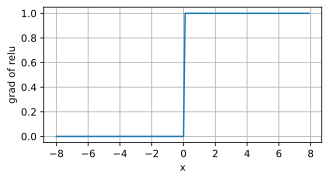

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

* Variants: *parameterized ReLU* (*pReLU*) function 
$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### Sigmoid Function



$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$





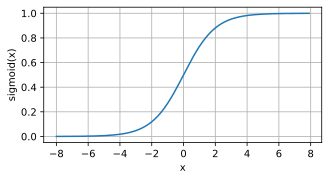

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

* The derivative of the sigmoid function:

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$


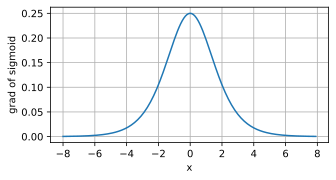

In [5]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### Tanh Function


$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$


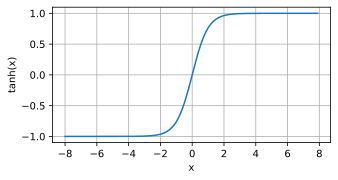

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

The derivative of the tanh function is:

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

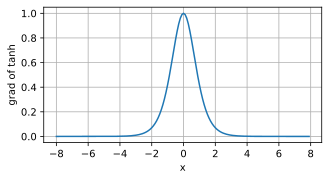

In [7]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## Summary

* MLP adds one or multiple fully-connected hidden layers between the output and input layers and transforms the output of the hidden layer via an activation function.
* Commonly-used activation functions include the ReLU function, the sigmoid function, and the tanh function. With each of these activation functions, MLPs with a single hidden layer is a universal approximator. 




#  Implementation of Multilayer Perceptrons

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

## Model

* Input dimension: 784
* Output dimension: 10
* Hidden layer dimension: 256

In [9]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

## Training 
* Similar to Softmax regression

In [10]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

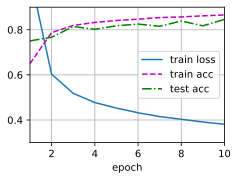

In [11]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# Underfitting, Overfitting and Model Selection, 

* The goal of machine learning is to discover patterns that *generalize* from training data to unseen data
* In learning of the models, we rely on the training data only
* Training data is a usually a small sample of the data with some underlying distribution
* Overfitting: the danger to fit the training data well but fail to generalize
* Regularisation: techniques to combat overfitting 

* Models usually involve some hyperparameters.
  * Hyperparameters: the parameters which define the learning framework
  * Parameter of the model: the parameters which define a model in a general learning framework
  * Weights of linear regression or neural networks are parameters
  * Learning rate, epoch number, regularization number, number of neurons are hyper-parameters

* In practice, one often split the available data into subsets: training set and validation set.
  * The training set is used to learn the parameters of the model
  * The validation set is used to select the hyper-parameters.

## Training Error and Generalization Error

* The *training error* is the error of our model as calculated on the training dataset,
* *Generalization error* is the expectation of our model's error when we apply the model to an infinite stream of additional data examples drawn from the same underlying data distribution as our original sample.
* We can never calculate the generalization error exactly.
* We must *estimate* the generalization error by applying our model to an independent test set.

### Statistical Learning Theory

* *i.i.d. assumption*: both the training data and the test data are drawn *independently* from *identical* distributions.
* The model complexity affects the generalization performance: VC dimension
* Simple models and abundant data:  we expect the generalization error to resemble the training error.
* Difficult to compare the complexity among different model classes

### Common factors of generalization

1. The number of tunable parameters.
1. The values taken by the parameters. When weights can take a wider range of values, models can be more susceptible to overfitting.
1. The number of training examples. 

## Model Selection

* Model selection: the process to select the model after evaluating several candidate models.
* A validation dataset is used if a large amount of data is available.
* Use cross-validation if the data size is small.

### $K$-Fold Cross-Validation

* The original training data is split into $K$ non-overlapping subsets.
* Then model training and validation are executed $K$ times,
* each time training on $K-1$ subsets and validating on a different subset (the one not used for training in that round).
* Finally, the training and validation errors are estimated by averaging over the results from the $K$ experiments.

## Underfitting or Overfitting?

* Generalization gap: the difference between the training error and the validation error
* Underfitting: substantial training error, small generalization gap
  * The model is usually too simple to reduce the training error
* Overfitting: small training error, large generalization gap
* Factors: the complexity of the model and the size of the available training datasets.

### Model Complexity

* An illustrative example: the polynomial of degree $d$

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

* Treat $x^i$ as a feature for each $i$.
* Then this is just a linear regression problem

* A higher-order polynomial function is more complex than a lower-order polynomial function.
* The relationship between polynomial degree and underfitting vs. overfitting 
![Influence of model complexity on underfitting and overfitting](../img/capacity-vs-error.svg)

# Weight Decay

* A simple regularization method
* Use norms of the weight vector to measure the complexity of the linear model 
* Add its norm as a penalty term in the loss function

* Least squared errors

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

* Least squared error plus $L_2$ norm penalty: ridge regression

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

*  $\lambda = 0$: reduces to the least sqaured error function.
*  $\lambda > 0$, restricts the size of $\| \mathbf{w} \|$.
* Divide by $2$: convention. when we take the derivative of a quadratic function, the $2$ and $1/2$ cancel out, ensuring that the expression for the update looks nice and simple.

* One can also use other types of norms in the penalty terms
  * $L_1$ norm: LASSO (least absolute shrinkage and selection operator)
  $$L(\mathbf{w}, b) + \lambda \|\mathbf{w}\|_1^2 $$ 
  * Combination of $L_1$ and $L_2$ norm:  Elastic net regularization
  $$L(\mathbf{w}, b) + \frac{\lambda_2}{2} \|\mathbf{w}\|^2 + \lambda_1 \|\mathbf{w}\|_1^2 $$

## Implementation

* The minibatch stochastic gradient descent updates for $L_2$-regularized regression follow:
$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

* Why called "weight decay"? Given the penalty term alone, the optimization algorithm *decays* the weight at each step of training.

## High-Dimensional Linear Regression

* Illustrate the benefits of weight decay through a simple synthetic example.

In [12]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

### Data generation

**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**
* The label is a linear function of our inputs,
* corrupted by Gaussian noise with zero mean and standard deviation 0.01.
* High dimension $d = 200$
* Small number of training example: 20 examples.

In [13]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## Implementation from Scratch


### [**Initializing Model Parameters**]

* Randomly initialize the model parameters.



In [14]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### (**Defining $L_2$ Norm Penalty**)

* Square all terms in place and sum them up.

In [15]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### [**Defining the Training Loop**]

* First fits the model on the training set and
* evaluates it on the test set.
* The linear network and the squared loss are the same as linear regression
* The only change here is that our loss now includes the penalty term.

In [16]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # The L2 norm penalty term has been added, and broadcasting
            # makes `l2_penalty(w)` a vector whose length is `batch_size`
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', torch.norm(w).item())

### [**Training without Regularization**]

* Run this code with `lambd = 0`, disabling weight decay.



L2 norm of w: 12.706735610961914


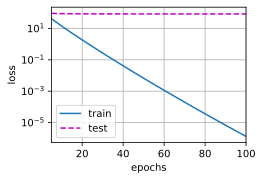

In [17]:
train(lambd=0)

### [**Using Weight Decay**]

* $\lambda=3$: substantial weight decay.
* Training error increases
* but the test error decreases.


L2 norm of w: 0.3619624376296997


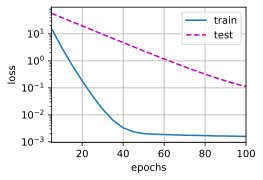

In [18]:
train(lambd=3)

## [**Concise Implementation**]

In [19]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # The bias parameter has not decayed
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

L2 norm of w: 13.595747947692871


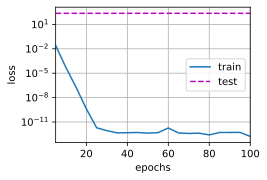

In [20]:
train_concise(0)

L2 norm of w: 0.38457709550857544


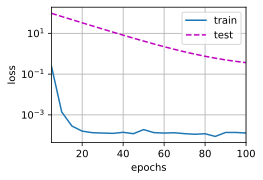

In [21]:
train_concise(3)

## Summary

* Regularization is a common method for dealing with overfitting. It adds a penalty term to the loss function on the training set to reduce the complexity of the learned model.
* One particular choice for keeping the model simple is weight decay using an $L_2$ penalty. This leads to weight decay in the update steps of the learning algorithm.
